In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('Housing.csv')

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [36]:
X = df[['area' , 'bedrooms', 'bathrooms']]
Y = df['price']

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [38]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

In [40]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [41]:
print(mse, r2)

2750040479309.0522 0.4559299118872445


In [48]:

def plot_feature_vs_target(df, features, target):
    for feature in features:
        X_feat = df[[feature]]
        Y = df[target]

        # Train a simple linear regression model on one feature
        model = LinearRegression()
        model.fit(X_feat, Y)
        Y_pred = model.predict(X_feat)

        # Plot
        plt.figure(figsize=(8, 5))
        plt.scatter(df[feature], Y, color='blue', label='Actual data', alpha=0.5)
        plt.plot(df[feature], Y_pred, color='red', label='Regression line')
        plt.xlabel(feature.capitalize())
        plt.ylabel(target.capitalize())
        plt.title(f"{target.capitalize()} vs {feature.capitalize()}")
        plt.legend()
        plt.grid(True)
        plt.show()


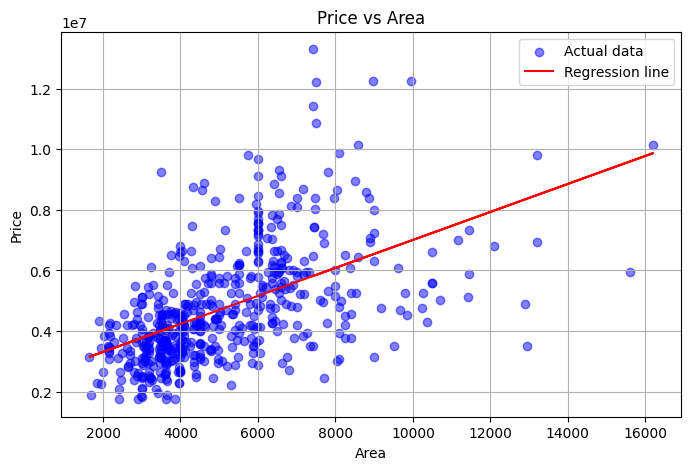

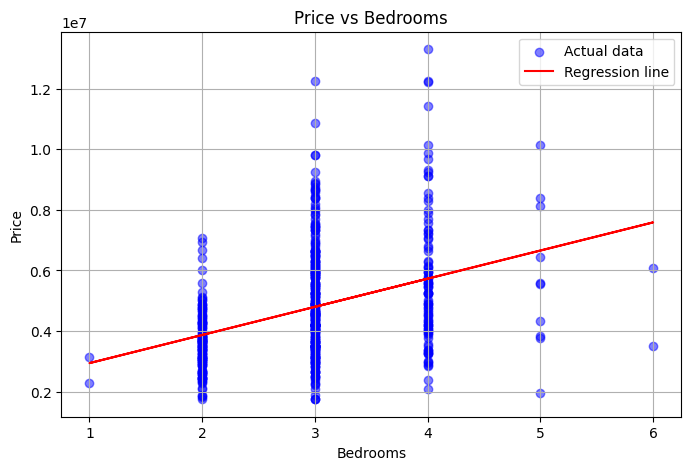

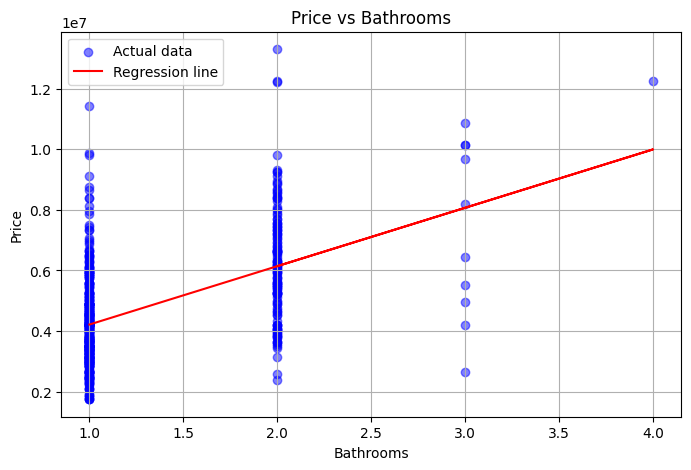

In [49]:
features = ['area', 'bedrooms', 'bathrooms']
plot_feature_vs_target(df, features, 'price')
